In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [3]:
reviews = pd.read_csv('../input/wine-reviews/winemag-data_first150k.csv', index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


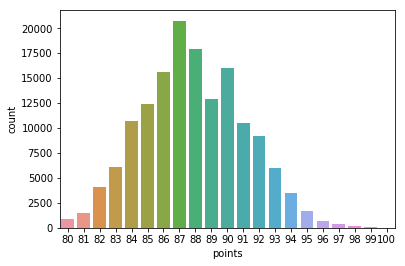

In [6]:
sns.countplot(reviews['points'])

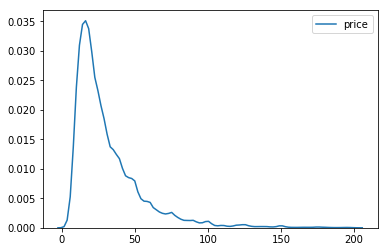

In [8]:
sns.kdeplot(reviews.query('price<200').price)

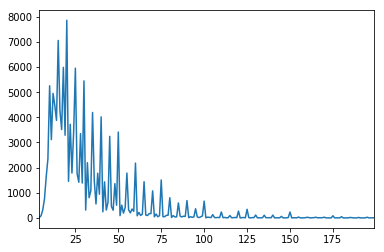

In [10]:
reviews[reviews['price']<200]['price'].value_counts().sort_index().plot.line()

/Users/dotrungkien/py35/lib/python3.5/site-packages/seaborn/distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


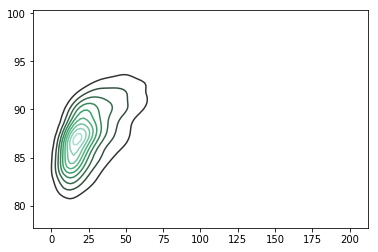

In [11]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

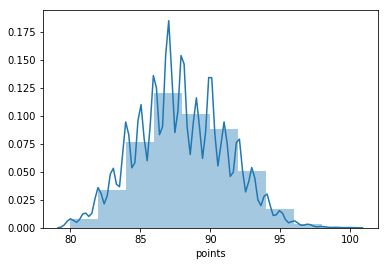

In [12]:
sns.distplot(reviews['points'], bins=10)

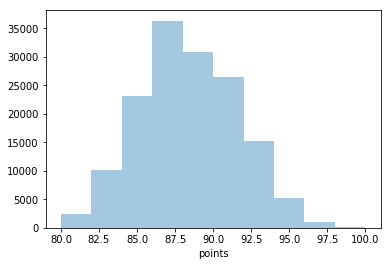

In [13]:
sns.distplot(reviews['points'], bins=10, kde=False)

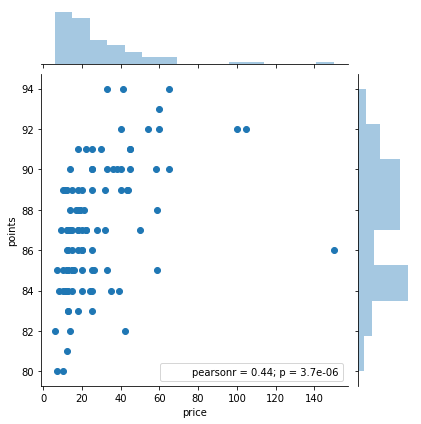

In [15]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price']<200].sample(100))

In [16]:
from inspect import signature
sig = signature(sns.jointplot)
sig.parameters

mappingproxy({'annot_kws': <Parameter "annot_kws=None">,
              'color': <Parameter "color=None">,
              'data': <Parameter "data=None">,
              'dropna': <Parameter "dropna=True">,
              'joint_kws': <Parameter "joint_kws=None">,
              'kind': <Parameter "kind='scatter'">,
              'kwargs': <Parameter "**kwargs">,
              'marginal_kws': <Parameter "marginal_kws=None">,
              'ratio': <Parameter "ratio=5">,
              'size': <Parameter "size=6">,
              'space': <Parameter "space=0.2">,
              'stat_func': <Parameter "stat_func=<function pearsonr at 0x1082279d8>">,
              'x': <Parameter "x">,
              'xlim': <Parameter "xlim=None">,
              'y': <Parameter "y">,
              'ylim': <Parameter "ylim=None">})

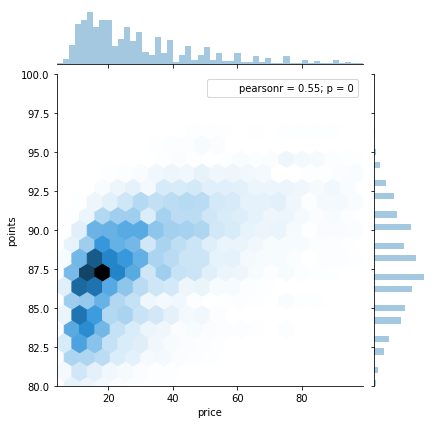

In [18]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', gridsize=20)

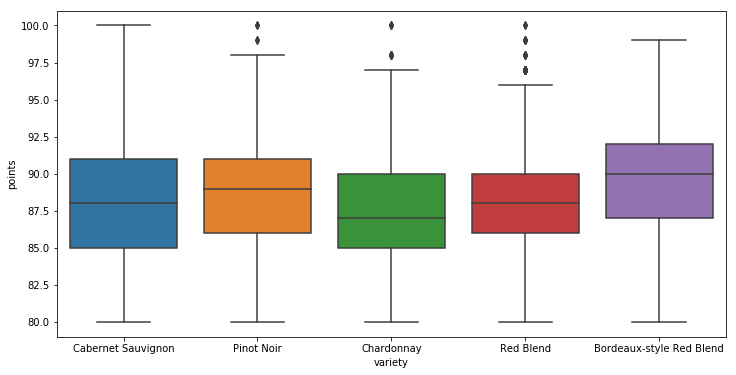

In [25]:
plt.figure(figsize=(12,6))

df = reviews[reviews['variety'].isin(reviews['variety'].value_counts().head(5).index)]

sns.boxplot(x='variety', y='points', data=df)

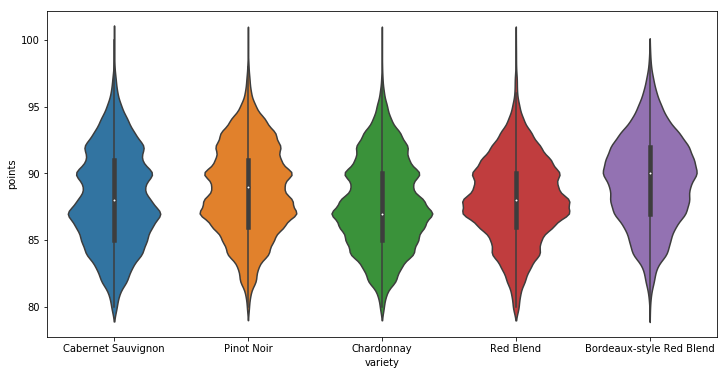

In [29]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    x='variety', y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)])

In [50]:
reviews.variety.value_counts().head(5).index

Index(['Chardonnay', 'Pinot Noir', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend'],
      dtype='object')

In [52]:
pokemon = pd.read_csv('../input/pokemon/Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


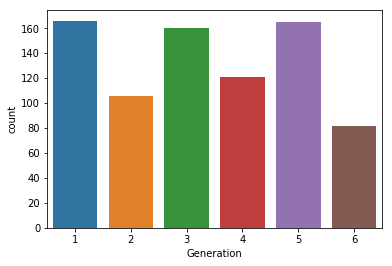

In [53]:
sns.countplot(pokemon['Generation'])

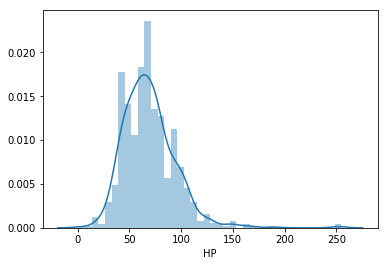

In [64]:
sns.distplot(pokemon['HP'])

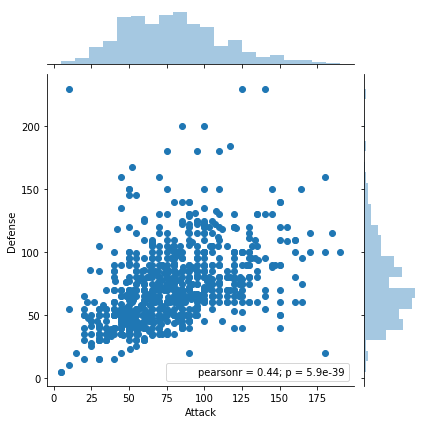

In [66]:
sns.jointplot(x='Attack', y='Defense', data=pokemon[['Attack', 'Defense']])

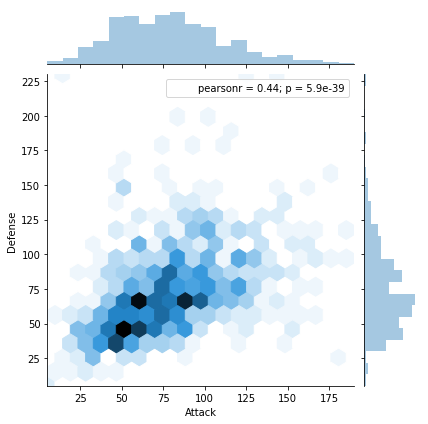

In [67]:
sns.jointplot(x='Attack', y='Defense', data=pokemon[['Attack', 'Defense']], kind='hex', gridsize=20)

/Users/dotrungkien/py35/lib/python3.5/site-packages/seaborn/distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


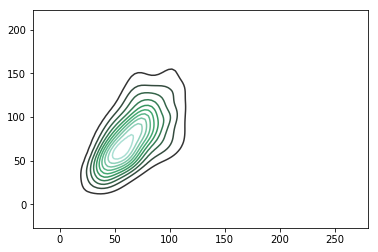

In [69]:
sns.kdeplot(pokemon[['HP', 'Attack']])

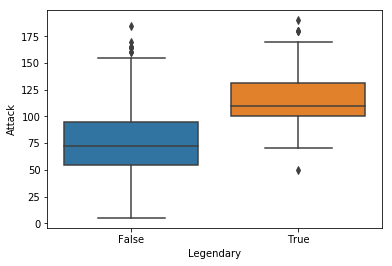

In [73]:
sns.boxplot(x='Legendary', y='Attack', data=pokemon)

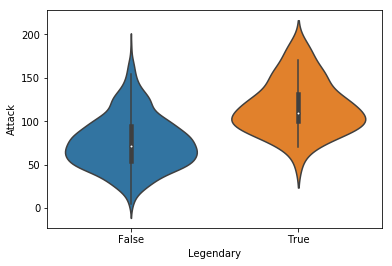

In [75]:
sns.violinplot(x='Legendary', y='Attack', data=pokemon)